<a href="https://colab.research.google.com/github/Mr-Premanand/Machine-Learning---Supervised-learning-models/blob/main/ML_Linear_regression_(Covid_data_csv_file).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Steps we will see to ML- Linear regression 
# MODEL-1
# 1. First perform small EDA to take small brief view about data to know the variable that we have to used to find relation between of then
# 2. Define the variable that which are indpendnt(X) and dependent (Y)
# 3. Now split the data into two part- Train data and test data
# 4. Now import linear regression model and fit trail data in that to get relation 
# 5. Now use the above Linear regression trained model to predict output(i.e y_pred) by passing independent x_test set
# 6. Now calculate the mean squared error(MSE) by taking  summation of square of diff betwen y_pred and y_test(i.e actual test data)
#    to check the MSE

# MODEL -2 ( skip EDA) we can use multiple independent variables
# Now perform the same steps by taking the diffrent independent variable to predict the same output
# i.e keep the y_train and y_test data same and change the x_train and x_test data
# after calculating the MSE for diffrent model for same output, compare the MSE and take model having least MSE for further use

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime as dt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Database
df=pd.read_csv("/content/drive/MyDrive/Machine learning/Data/covid_19_india.csv", parse_dates=["Date"], dayfirst=True)

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
# In we do not need all coluns so that we will keep only required column and again define as df
df=df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

# Change the names of column
df.columns=['date','state','cured','death','confirmed']

In [ ]:
# eirlier record
df.head()

,date,state,cured,death,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
# latest record
df.tail()

,date,state,cured,death,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


# Step-1
Perform EDA

In [ ]:
# Now we will analyse latest cases 
today=df[df.date=="2021-08-11"]
today.head()

,date,state,cured,death,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279


In [ ]:
# Now get the maximum confirmed cases stated fro todays
# sort it from highest to low
max_confirmed_cases=today.sort_values(by="confirmed", ascending=False)
max_confirmed_cases

,date,state,cured,death,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


In [ ]:
# Top 5 states with max confirmed cases
Top_case_states=max_confirmed_cases[0:5]
Top_case_states

,date,state,cured,death,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


<function matplotlib.pyplot.show>

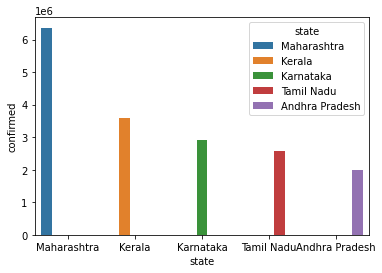

In [ ]:
# Now plot the above result
sns.barplot(x="state",y='confirmed',data=Top_case_states,hue="state")
plt.show 

In [ ]:
# Now sort the states base on highest death rate
max_death_cases=today.sort_values(by="death", ascending=False)
max_death_cases

,date,state,cured,death,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18090,2021-08-11,Kerala,3396184,18004,3586693
18101,2021-08-11,Punjab,582791,16322,599573
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18080,2021-08-11,Chhattisgarh,988189,13544,1003356


In [ ]:
# Top 5 states with max death cases
Top_death_states=max_death_cases[0:5]
Top_death_states

,date,state,cured,death,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


<function matplotlib.pyplot.show>

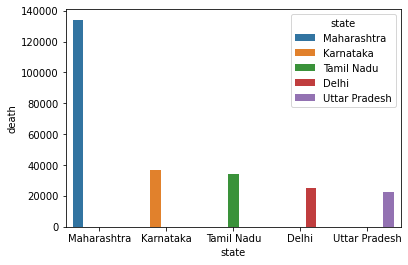

In [ ]:
# Now plot the above result
sns.barplot(x="state",y='death',data=Top_death_states,hue="state")
plt.show 

In [ ]:
# Now check the cases and death only in maharashtra because of max cases in maharashtra
mh=df[df.state=="Maharashtra"]
mh

,date,state,cured,death,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


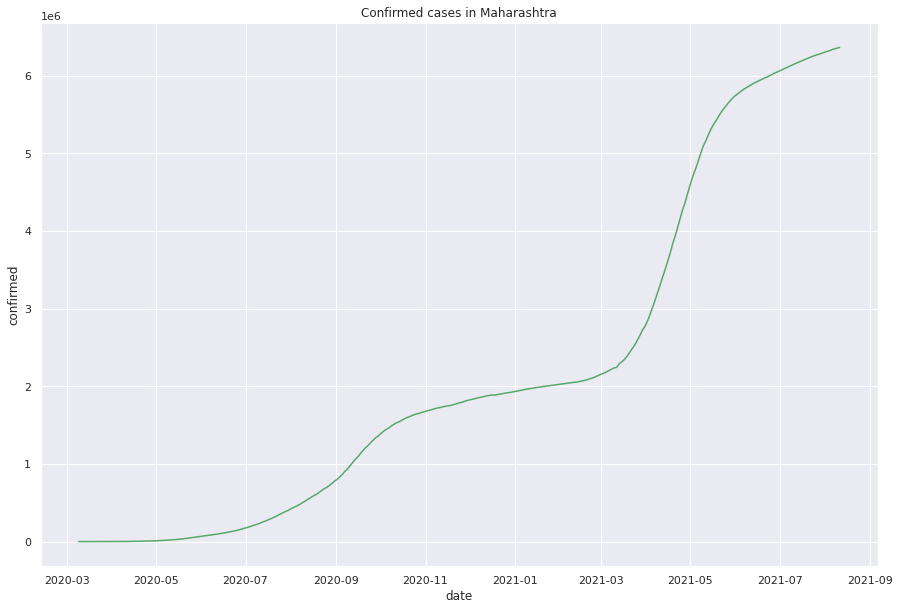

In [ ]:
#visualized the confirmed cases in maharashtra
#set the size for plot
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed", data=mh,color='g').set(title="Confirmed cases in Maharashtra")
plt.show()

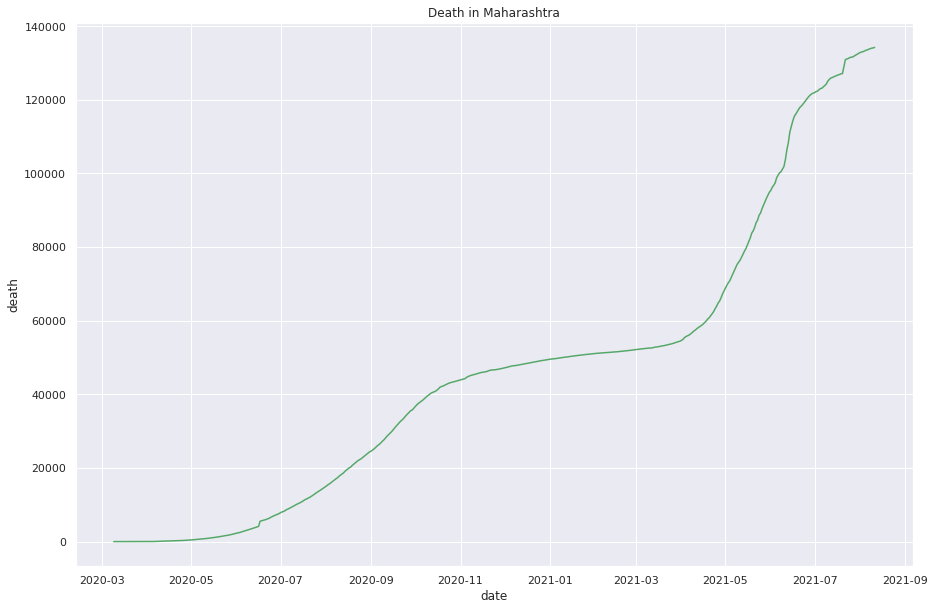

In [ ]:
#visualized the confirmed death in maharashtra
#set the size for plot
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="death", data=mh,color='g').set(title="Death in Maharashtra")
plt.show()

In [ ]:
# Now similar analysis for kerla 
kerala=df[df.state=="Kerala"]
kerala

,date,state,cured,death,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574


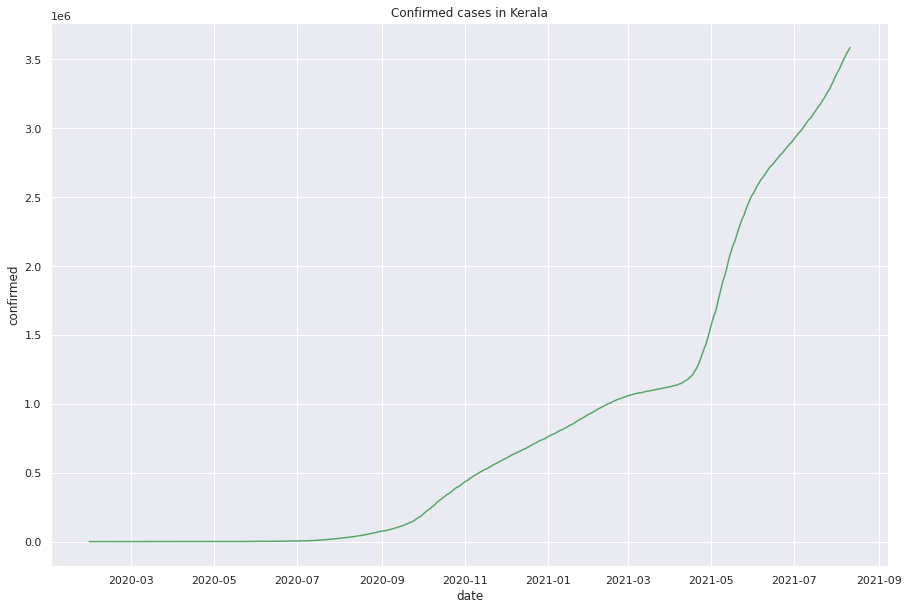

In [ ]:
#visualized the confirmed cases in kerala
#set the size for plot
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=kerala,color='g').set(title="Confirmed cases in Kerala")
plt.show()

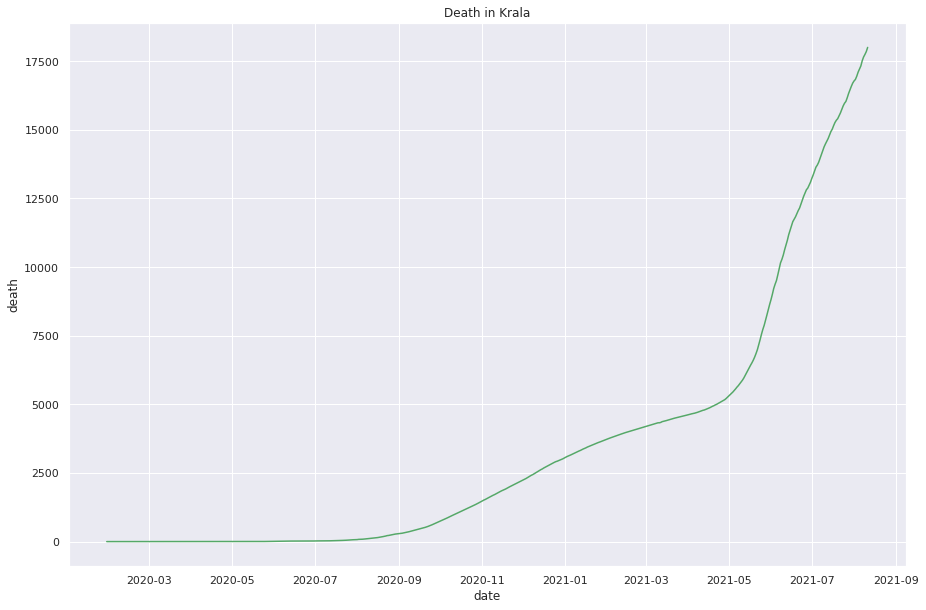

In [ ]:
#visualized the confirmed death in kerala
#set the size for plot
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="death", data=kerala,color='g').set(title="Death in Krala")
plt.show()

In [ ]:
# Now similar analysis for jammu and kashmir
JK=df[df.state=="Jammu and Kashmir"]
JK

,date,state,cured,death,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
17943,2021-08-07,Jammu and Kashmir,316496,4386,322286
17979,2021-08-08,Jammu and Kashmir,316632,4386,322428
18015,2021-08-09,Jammu and Kashmir,316761,4389,322550
18051,2021-08-10,Jammu and Kashmir,316957,4390,322658


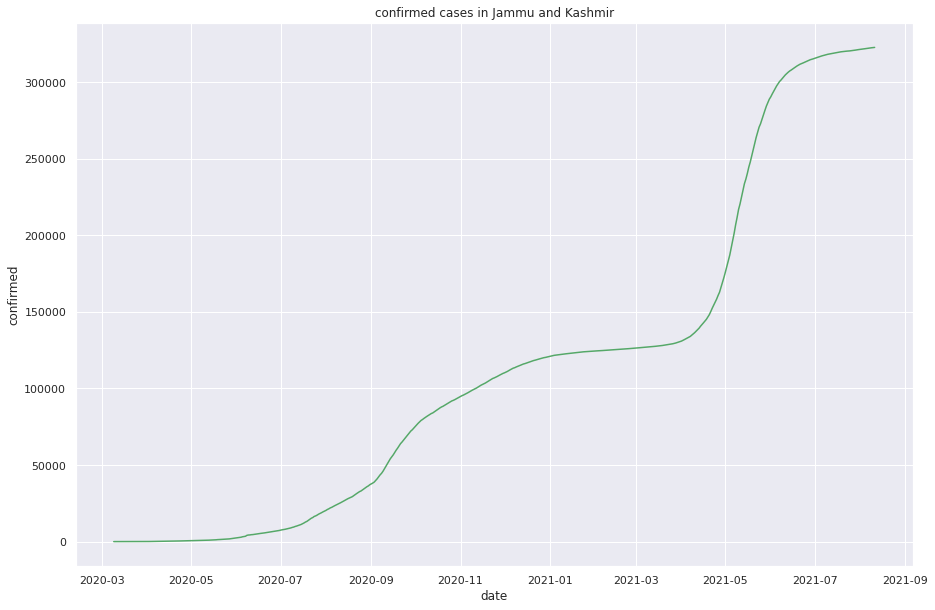

In [ ]:
#visualized the confirmed cases in JK
#set the size for plot
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed", data=JK,color='g').set(title="confirmed cases in Jammu and Kashmir")
plt.show()

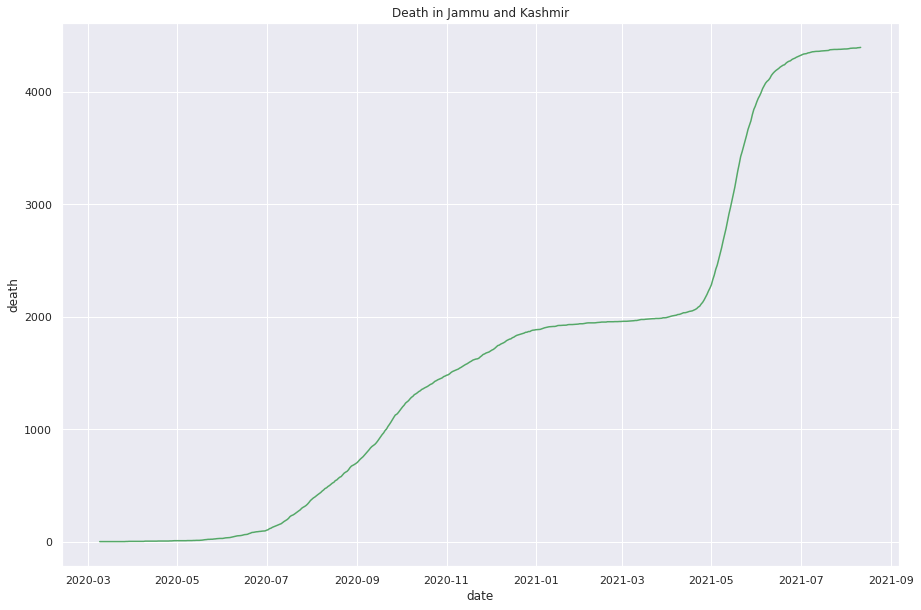

In [ ]:
#visualized the confirmed death in JK
#set the size for plot
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="death", data=JK,color='g').set(title="Death in Jammu and Kashmir")
plt.show()

# Step-2

Linear regression in Maharashtra

y=mx+c

In this we will take "Date" as independent variable i.e x
and "Confirmed"cases takes as dependent variable i.e y  ,   so that by puting the date we can easily predict the cases.

In [ ]:
# Converting date to ordinal
mh["date"]=mh["date"].map(dt.datetime.toordinal)
mh.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,state,cured,death,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [ ]:
# Define dependent and independent variables
x=mh[['date']]
y=mh[['confirmed']]

Step-3

Split the date into train and test set

In [ ]:
# here we have given test size 0.3 i.e 30% data from dataset will be consider as test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Step-4
fit the data into linear regresson model

In [ ]:
# we have imported linearRegression Lib already above so we define it as notaion lr2 for Model-2
lr=LinearRegression()

In [ ]:
# Fit the train data
lr.fit(x_train,y_train)

LinearRegression()

Step-5

Now feed the test data to test the accuracy i.e feed the x_test data 

In [ ]:
# now we will test data over by using independet variable x_test to check result as per the y_test
# use above trained linear regression relation
y_pred=lr.predict(x_test)
y_pred

array([[ 2518429.69419289],
       [ 3424346.07357597],
       [ -613452.64595604],
       [ 1250146.76305962],
       [ 1146613.46255875],
       [ -147552.79370308],
       [ 3113746.17207336],
       [ 4938520.59339905],
       [ 2169004.80500412],
       [  797188.57336807],
       [ 2052529.84193993],
       [  434822.02161407],
       [ -354619.39470291],
       [-1169944.13614845],
       [ 3049037.85926056],
       [  447763.6841774 ],
       [ 4770278.98008537],
       [ 3294929.44795036],
       [-1066410.83564758],
       [ 4485562.40370941],
       [ 1276030.08818436],
       [ 1871346.56606293],
       [ -716985.94645691],
       [ 3320812.7730751 ],
       [  525413.65955353],
       [ 5080878.88158798],
       [ 1457213.36405945],
       [ 1832521.57837486],
       [ 1767813.26556206],
       [  874838.5487442 ],
       [ 3333754.43563652],
       [  628946.9600544 ],
       [ 4149079.17708206],
       [ 3851420.93814087],
       [ 1586629.98968697],
       [ 2544313.019

In [ ]:
#Now vie actual y_test values to check wheather y_pred values are come as per y_test
y_test.head()

,confirmed
9742,1899352
12262,2161467
1272,6430
6300,1077374
6020,907212


Step
Find MSE 

In [ ]:
# we already imported MSE lib so we will directly find the MSE
# mean squre error of model 1
mean_squared_error(y_test,y_pred)

509022269960.2831

In [ ]:
# Also check the accuracy
lr.score(x_test,y_test)

0.874443276221981

In [ ]:
# Note
# while defining variables if we did not put double squ column so that it will not be make dataframe it make numpy array so to treat such 
# a mistake we need to put following code while fiting the model and also need to take np.array at every time
#  code=    lr.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

